# Machine Learning With Python - Final Project

## Q1) Views about the problem statement

#### The problem statement presents a clear and practical challenge: predicting the salary of newly hired employees for TechWorks Consulting using historical employee data. This task is highly relevant in the context of human resource management and compensation planning. Here are my views on the problem statement:

* Importance of Fair Compensation: Ensuring fair and competitive compensation is crucial for attracting and retaining top talent.
* Business Impact: Accurate salary predictions can improve employee satisfaction and reduce turnover rates.
* Data-Driven Decision Making: Using machine learning for salary prediction allows the company to leverage historical data to make informed decisions. This can help in identifying patterns and trends that might not be apparent through manual analysis.
* Opportunity for Innovation:This task provides an opportunity to explore various regression techniques and feature engineering methods. It also allows for the application of advanced machine learning concepts such as ensemble methods and hyperparameter tuning to improve model performance.

In summary, the problem statement is well-defined and presents a meaningful challenge with significant business implications. It combines elements of data preparation, exploratory analysis, machine learning model development, and evaluation, making it a comprehensive and impactful project in the field of data science and human resources.

## Q2) Approach to Solve the Task

#### 1.Data Preparation
* Load data
* Handle missing values
* Convert categorical variables into dummy variables
* Handle outliers
* scale features

#### 2.Exploratory Data Analysis
* Data visualization
* Correlation analysis

#### 3.Model Selection and Training
* Split the data
* Train multiple regression models
* Model training and hyperparameter tuning

#### 4.Model Evaluation
* Evaluate models using R², MSE,
* Compare model performance

#### 5.Conclusion
* Summary of findings
* Best performing model and reasons

# 1.Data Exploration

In [7]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Loading Dataset
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Internshala/Python/Data Files/4. Projects/ML case Study.csv', header = 0)

In [9]:
college  = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Internshala/Python/Data Files/4. Projects/Colleges.csv', header = 0)

In [10]:
city = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Internshala/Python/Data Files/4. Projects/cities.csv', header = 0)

In [11]:
# Loading The First 5 Rows Of Dataset
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [12]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [13]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [14]:
# Turning Required Data Into List
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()
metro_city = city['Metrio City'].tolist()
non_metro_city = city['non-metro cities'].tolist()

In [15]:
# Turning Categorical Data Into Numerical Data Using If,Else Statement
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15728\3622273140.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item,2,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15728\3622273140.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [16]:
for item in df.City:
    if item in metro_city:
        df['City'].replace(item,1,inplace = True)
    elif item in non_metro_city:
        df['City'].replace(item,0,inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15728\739943289.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(item,0,inplace= True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15728\739943289.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [17]:
# Loading The Dataset
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [18]:
# Geting Dummy Variables For Categorical Data
df = pd.get_dummies(df,dtype = int,drop_first = True)

In [19]:
# Loading The Dataset
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,1,0,60347.0,2,52,28,76764.02,0
3,1,0,49010.0,2,81,33,82092.39,0
4,3,0,57879.0,4,74,32,73878.10,0


# 2.Univariate Analysis And EDD

In [21]:
# Identifying Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


* No missing values in the dataset

In [23]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


<Axes: xlabel='Role_Manager', ylabel='count'>

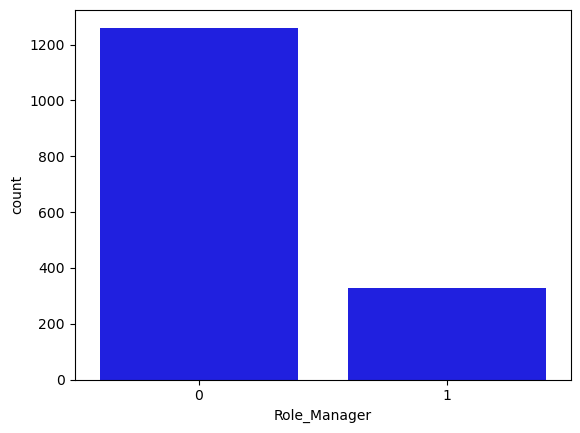

In [24]:
# Bar graph for Role_Managers
sns.countplot( x = df["Role_Manager"],color = "blue")

<Axes: xlabel='College', ylabel='count'>

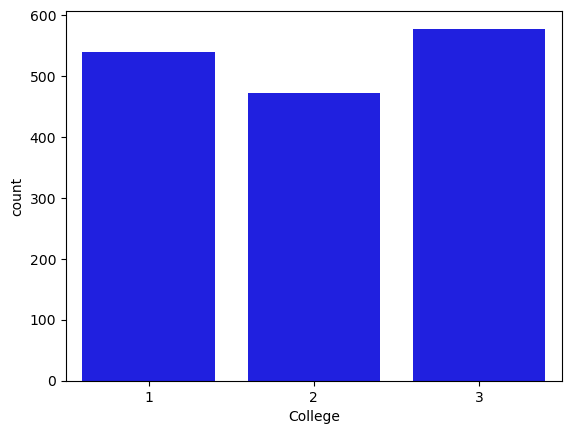

In [25]:
#Bar graph for employee from different colleges
sns.countplot( x = df["College"],color = "blue")

<Axes: xlabel='City', ylabel='count'>

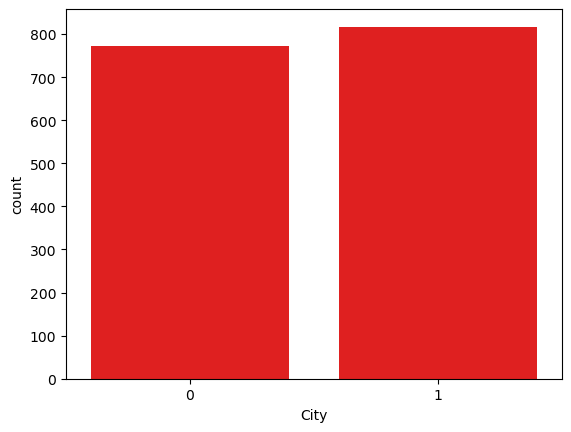

In [26]:
#Bar graph for employee from different city
sns.countplot(x = df["City"],color = "Red")

C:\Users\HP\AppData\Local\Temp\ipykernel_15728\1098980756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["EXP (Month)"],kde = False,color = "red")


<Axes: xlabel='EXP (Month)'>

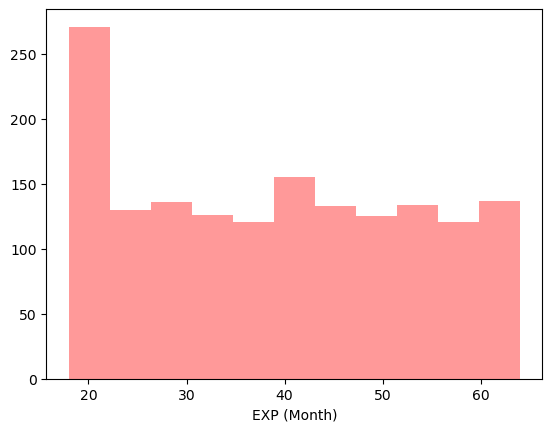

In [27]:
# Count Of people with different work experience
sns.distplot( df["EXP (Month)"],kde = False,color = "red")

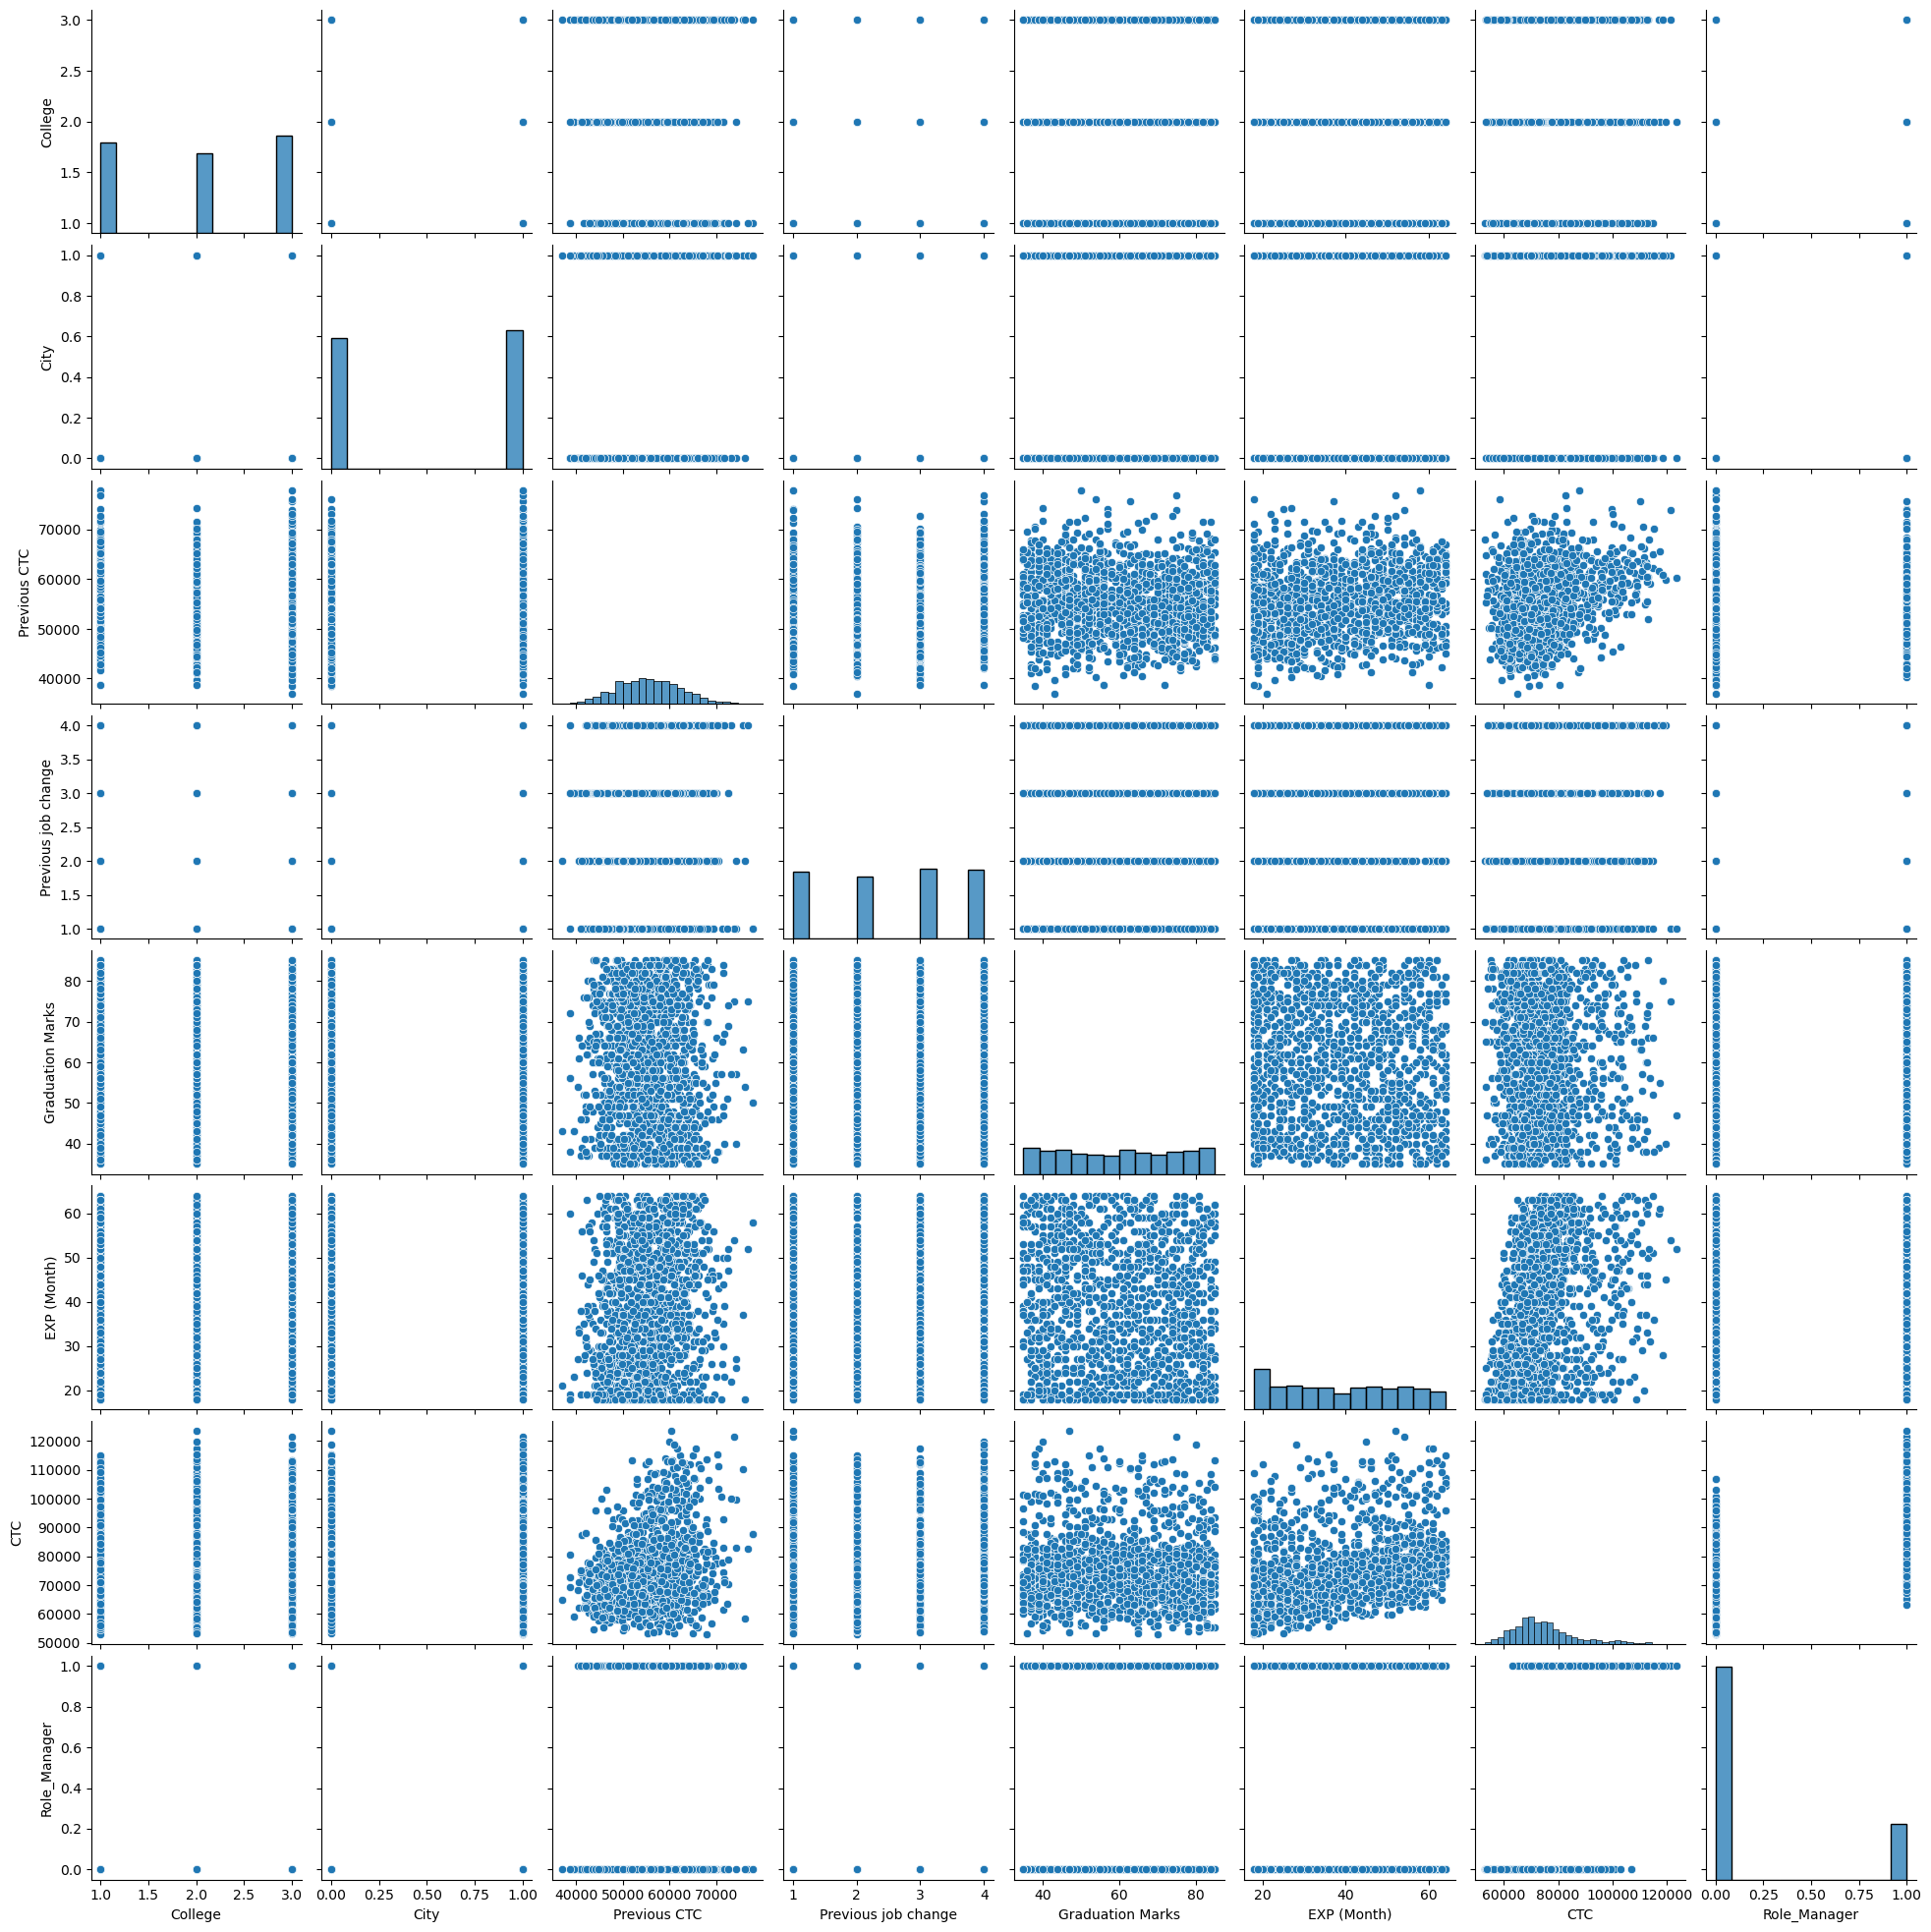

In [28]:
# All Graphs of variables
sns.pairplot(df)

#### Observations:
* There are some extreme values but no outliers because the mean and median are close to each other.Hence, there is no need of outliers treatment.

# 3.Bivariate Analysis

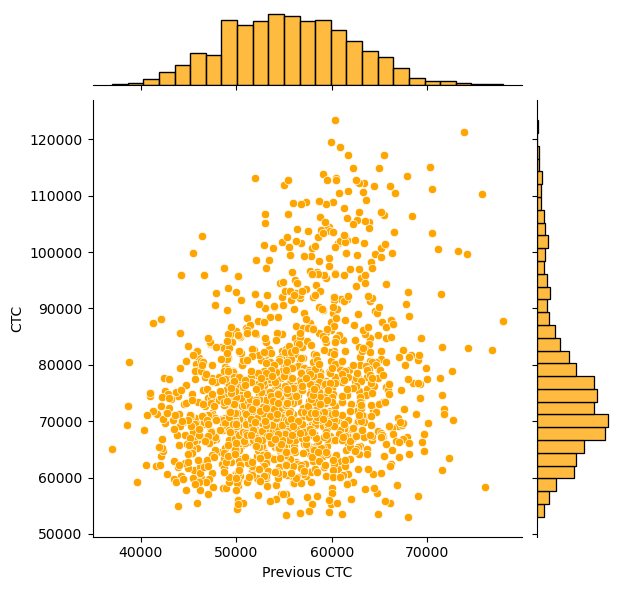

In [31]:
#Scatter plot for Previous CTC VS CTC
sns.jointplot(x = "Previous CTC",y = "CTC",data = df,color = "orange")

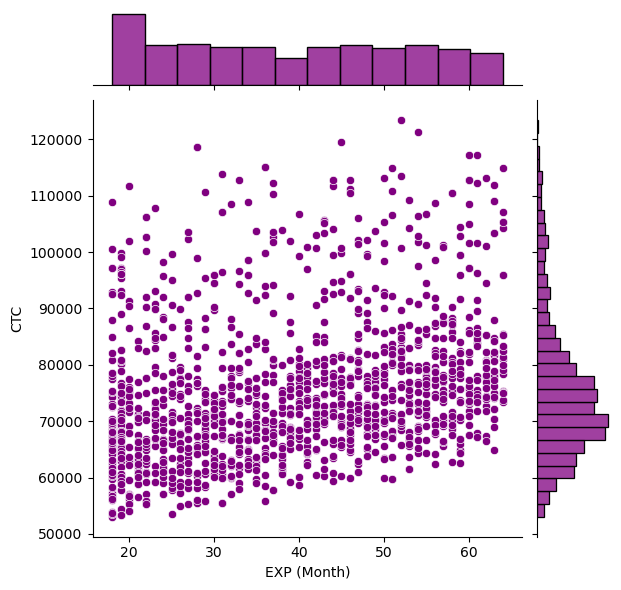

In [32]:
sns.jointplot(x='EXP (Month)',y='CTC',data=df,color='purple')

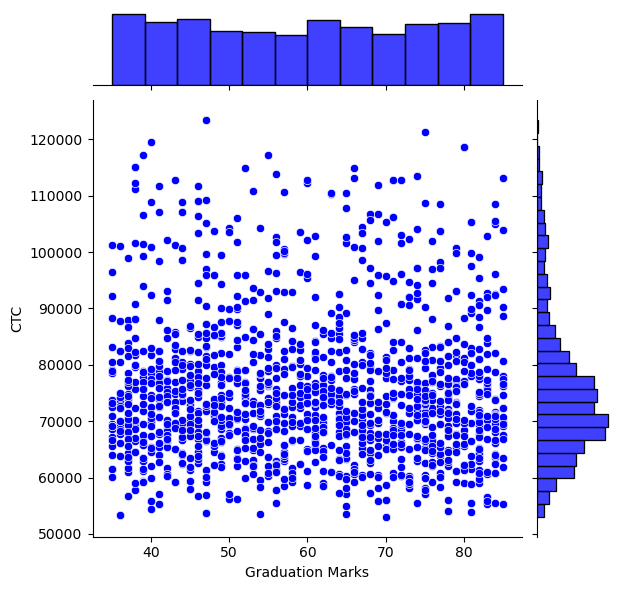

In [33]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df,color='blue')

In [34]:
# Creating a correlation matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


#### Observations:
* CTC (Cost to Company) and Role_Manager: There's a strong positive correlation (0.621311) between CTC and Role_Manager, indicating that employee with manager roles tend to get a high CTC.
* CTC and EXP (Month): A moderate positive correlation (0.301115) suggests that employees with more experience (longer EXP in months) generally have higher CTCs.

# 5. Data Splitting

In [37]:
# Importing Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
#Defining Independent Variables
X_multi = df.drop("CTC",axis = 1)

In [39]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,1,0,60347.0,2,52,28,0
3,1,0,49010.0,2,81,33,0
4,3,0,57879.0,4,74,32,0


In [40]:
# Defining Independent Variables
y_multi = df["CTC"]

In [41]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_multi,y_multi,test_size = 0.2,random_state = 42)

In [43]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [44]:
# Standardize training data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [45]:
X_test_s = scaler.transform(X_test)

# 5.Model Selection

### A) Multiple Linear Regression

In [48]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
# Creating a linear regression model
lm = LinearRegression()

In [50]:
# Fit the model to the scaled training data
lm.fit(X_train_s,y_train)

LinearRegression()

In [51]:
# Make predictions on the scaled train and test data
y_test_pred = lm.predict(X_test_s)
y_train_pred = lm.predict(X_train_s)

In [52]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.5933517958385082
R-Square For Train : 0.5137747142134839
Mean Squared Error For Test: 77362774.94956557


#### Observations:
* The R-squared values suggest that the model has a moderate fit. It's not explaining all the variability in the data, but it is capturing a significant portion of it.

### B) Ridge Regression

In [56]:
# Importing Libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [57]:
# Create a Ridge regression model
lm_r = Ridge()

In [58]:
# Creating Alpha Range
alpha_range = np.logspace(-2,8,100)

In [59]:
# Define the parameter grid for alpha values
param_grid = {'alpha': alpha_range}

In [60]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lm_r, param_grid=param_grid, cv=5, scoring='r2')

In [61]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8....
       4.75081016e+05, 5.99484250e+05, 7.56463328e+05, 9.54548457e+05,
       1.20450354e+06, 1.51991108e+06, 1.91791026e+06, 2.42012826e+06,
       3.05385551e+06, 3.85352859e+06, 4.86260158e+06, 6.13590727e+06,
       7.74263683e+06, 9.77009957e+06, 1.23284674e+07, 1.55567614e+07,
       1.96304065e+07, 2.47707636e+07, 3.12571585e+07, 3.94420606e+07,
       4.97702356e+07, 6.28029144e+07, 7.92482898e+07, 1.00000000e+08])},
             scoring='r2')

In [62]:
# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 6.7341506577508214}


In [63]:
# Use the best model for predictions
lm_r_best = grid_search.best_estimator_

In [64]:
# Make predictions on the scaled train and test data
y_test_pred = lm_r_best.predict(X_test_s)
y_train_pred = lm_r_best.predict(X_train_s)

In [65]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.5924250044902089
R-Square For Train : 0.513760794015264
Mean Squared Error For Test: 77539092.34078959


#### Observations:
* R-Square for Test (0.592): This value indicates that approximately 59.2% of the variability in the test data is explained by the ridge regression model. This is very similar to the multiple linear regression model's R-squared value of 59.3%.
* R-Square for Train (0.514): This value indicates that approximately 51.4% of the variability in the training data is explained by the model. This is almost identical to the multiple linear regression model's R-squared value of 51.4%.
* MSE for Test (77,539,092.34): This value is slightly higher than the multiple linear regression model's MSE of 77,362,774.95, indicating a marginally worse fit on the test data.
* Both models show a moderate fit, explaining around 51.4% of the variance in the training data and about 59.2-59.3% in the test data

### C) Lasso Regression

In [68]:
# Importing Libraries
from sklearn.linear_model import Lasso

In [69]:
# Create a Lasso regression model
lm_l = Lasso()

In [70]:
# Creating Alpha Range
alpha_range = np.logspace(-2,8,100)

In [71]:
# Define the parameter grid for alpha values
param_grid = {'alpha': alpha_range}

In [72]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lm_l, param_grid=param_grid, cv=5, scoring='r2')

In [73]:
# Fit the grid search to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8....
       4.75081016e+05, 5.99484250e+05, 7.56463328e+05, 9.54548457e+05,
       1.20450354e+06, 1.51991108e+06, 1.91791026e+06, 2.42012826e+06,
       3.05385551e+06, 3.85352859e+06, 4.86260158e+06, 6.13590727e+06,
       7.74263683e+06, 9.77009957e+06, 1.23284674e+07, 1.55567614e+07,
       1.96304065e+07, 2.47707636e+07, 3.12571585e+07, 3.94420606e+07,
       4.97702356e+07, 6.28029144e+07, 7.92482898e+07, 1.00000000e+08])},
             scoring='r2')

In [74]:
# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 138.48863713938718}


In [75]:
# Use the best model for predictions
lm_l_best = grid_search.best_estimator_

In [76]:
# Make predictions on the scaled train and test data
y_test_pred = lm_l_best.predict(X_test_s)
y_train_pred = lm_l_best.predict(X_train_s)

In [77]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.5892208565507875
R-Square For Train : 0.5131181987432607
Mean Squared Error For Test: 78148665.36584131


#### Observations:
* R-Square for Test (0.589): This value indicates that approximately 58.9% of the variability in the test data is explained by the lasso regression model. This is slightly lower than both the multiple linear regression model (59.3%) and the ridge regression model (59.2%).
* R-Square for Train (0.513): This value indicates that approximately 51.3% of the variability in the training data is explained by the model. This is almost identical to the R-squared values of the multiple linear regression model (51.4%) and ridge regression model (51.4%).
* MSE for Test (78,148,665.37): This value is higher than the MSEs of both the multiple linear regression model (77,362,774.95) and the ridge regression model (77,539,092.34), indicating a slightly worse fit on the test data.
* All three models show a moderate fit, with R-squared values around 51-52% for the training data and 58-59% for the test data.

### D) KNN Regression

In [80]:
#Importing library
from sklearn.neighbors import KNeighborsRegressor

In [81]:
# Defining N neighbors range
n_neighbors_range = np.arange(1,101)

In [82]:
# Defining the parameter grid
param_grid = {'n_neighbors': n_neighbors_range}

In [83]:
# Create a KNN regressor
knn = KNeighborsRegressor()

In [84]:
# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5,n_jobs = -1, scoring='r2')

In [85]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='r2')

In [86]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 15}


In [87]:
# Use the best model
knn_best = grid_search.best_estimator_

In [88]:
# Make predictions on the scaled train and test data
y_test_pred = knn_best.predict(X_test_s)
y_train_pred = knn_best.predict(X_train_s)

In [89]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6162755232962773
R-Square For Train : 0.6044948086831834
Mean Squared Error For Test: 73001651.13253702


#### Observations:
* R-Square for Test (0.616): This value indicates that approximately 61.6% of the variability in the test data is explained by the KNN regression model. This is higher than the R-squared values for the multiple linear regression (0.593), ridge regression (0.592), and lasso regression (0.589) models, indicating a better fit on the test data.
* R-Square for Train (0.604): This value indicates that approximately 60.4% of the variability in the training data is explained by the model. This is also higher than the R-squared values for the multiple linear regression (0.514), ridge regression (0.514), and lasso regression (0.513) models, suggesting a better fit on the training data as well.
* MSE for Test (73,001,651.13): This value is lower than the MSEs of the multiple linear regression (77,362,774.95), ridge regression (77,539,092.34), and lasso regression (78,148,665.37) models, indicating a better fit on the test data.
* The KNN regression model shows a better fit on both the training and test data compared to the multiple linear regression, ridge regression, and lasso regression models.

### E) Regression Tree

In [92]:
#Importing libraries
from sklearn import tree

In [93]:
# Creating a Tree Regressor
regtree = tree.DecisionTreeRegressor(random_state = 42,criterion = 'friedman_mse')

In [94]:
# Define the parameter grid
param_grid = {'max_depth': [None,2,4,6,8],'min_samples_split': [10,20,30,40,50],'min_samples_leaf': [10,20,30,40,50],'max_features': [1,2,3,4,5,6,7]}

In [95]:
# Create a GridSearchCV object
grid_search = GridSearchCV(regtree, param_grid, cv=5, scoring='r2',n_jobs = -1)

In [96]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='r2')

In [97]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [98]:
# Use the best model
regtree_best = grid_search.best_estimator_

In [99]:
# Make predictions on the scaled train and test data
y_test_pred = regtree_best.predict(X_test_s)
y_train_pred = regtree_best.predict(X_train_s)

In [100]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.5989105482524167
R-Square For Train : 0.6278702993772421
Mean Squared Error For Test: 76305250.26951858


#### Observations:
* R-Square for Test (0.599): This value indicates that approximately 59.9% of the variability in the test data is explained by the regression tree model. This is slightly higher than the multiple linear regression (0.593), ridge regression (0.592), and lasso regression (0.589) models, but lower than the KNN regression model (0.616).
* R-Square for Train (0.628): This value indicates that approximately 62.8% of the variability in the training data is explained by the model. This is higher than the multiple linear regression (0.514), ridge regression (0.514), lasso regression (0.513), and KNN regression (0.604) models, suggesting a better fit on the training data.
* MSE for Test (76,305,250.27): This value is lower than the MSEs of the multiple linear regression (77,362,774.95), ridge regression (77,539,092.34), and lasso regression (78,148,665.37) models, but higher than the KNN regression model (73,001,651.13), indicating a better fit on the test data compared to the linear models but not as good as KNN.
* Overall, the regression tree model shows a moderate fit, similar to the other models, but with a tendency to overfit.

### F) Bagging Regression

In [103]:
# Importing libraries
from sklearn.ensemble import BaggingRegressor

In [104]:
# Creating a Bagging Regressor:
reg_tree = tree.DecisionTreeRegressor()

In [105]:
# Create a Bagging Regressor with Decision Trees as base estimators
bag_reg = BaggingRegressor(estimator=reg_tree, n_estimators=1000,bootstrap = True, random_state=42)

In [106]:
#Creating a param grid
param_grid = {"max_features" :[1,2,3,4,5,6,7],'max_samples' : [0.9,1]}

In [107]:
# Creating a grid search
grid_search = GridSearchCV(estimator=bag_reg, param_grid=param_grid, cv=5, scoring='r2',n_jobs = -1)

In [108]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        n_estimators=1000, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'max_samples': [0.9, 1]},
             scoring='r2')

In [109]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_features': 7, 'max_samples': 0.9}


In [110]:
# Use the best model
bag_reg_best = grid_search.best_estimator_

In [111]:
# Make predictions on the scaled train and test data
y_test_pred = bag_reg_best.predict(X_test_s)
y_train_pred = bag_reg_best.predict(X_train_s)

In [112]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6385571857679783
R-Square For Train : 0.9386915420708561
Mean Squared Error For Test: 68762676.94880788


#### Observations:
* R-Square for Test (0.639): This value indicates that approximately 63.9% of the variability in the test data is explained by the bagging regression model. This is the highest R-squared value among all models compared so far, indicating the best fit on the test data.
* R-Square for Train (0.939): This value indicates that approximately 93.9% of the variability in the training data is explained by the model. This is significantly higher than all other models, indicating a very strong fit on the training data.
* MSE for Test (68,762,676.95): This value is the lowest among all models compared, indicating the best fit on the test data in terms of prediction error.
* The bagging regression model shows the best fit on the test data, with the highest R-squared value and the lowest MSE.

### G) Random Forest

In [115]:
#Importing Library
from sklearn.ensemble import RandomForestRegressor

In [116]:
# Defining Random Forest to a object
rf_reg = RandomForestRegressor(n_estimators = 1000,random_state = 42)

In [117]:
# Define the parameter grid
param_grid = {'max_depth': [None,2,4,6,8],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features' : [2,3,4,]}

In [118]:
# Create a Grid Search object
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2',n_jobs = -1)

In [119]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [120]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [121]:
# Use the best model
rf_reg_best = grid_search.best_estimator_

In [122]:
# Make predictions on the scaled train and test data
y_test_pred = rf_reg_best.predict(X_test_s)
y_train_pred = rf_reg_best.predict(X_train_s)

In [123]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6449851988292149
R-Square For Train : 0.9504973590126033
Mean Squared Error For Test: 67539779.80395332


#### Observations:
* R-Square for Test (0.645): This value indicates that approximately 64.5% of the variability in the test data is explained by the random forest regression model. This is the highest R-squared value among all models compared so far, indicating the best fit on the test data.
* R-Square for Train (0.950): This value indicates that approximately 95.0% of the variability in the training data is explained by the model. This is very high, suggesting a very strong fit on the training data and potential overfitting.
* MSE for Test (67,539,779.80): This value is the lowest among all models compared, indicating the best fit on the test data in terms of prediction error.
* The random forest regression model shows the best fit on the test data, with the highest R-squared value and the lowest MSE.

### H) Gradient Boosting

In [126]:
# Import library
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
# Create a Gradient Boosting Regressor:
gb_reg = GradientBoostingRegressor(n_estimators = 1000,learning_rate = 0.1,random_state = 42)

In [128]:
# Define the parameter grid
param_grid = {'max_depth': [None,2,4],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2],'max_features' : [2,3,4],'subsample' : [0.6,0.7,0.8]}

In [129]:
# Create a Grid Search object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='r2',n_jobs = -1)

In [130]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=1000,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='r2')

In [131]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0.7}


In [132]:
# Use the best model
gb_reg_best = grid_search.best_estimator_

In [133]:
# Make predictions on the scaled train and test data
y_test_pred = gb_reg_best.predict(X_test_s)
y_train_pred = gb_reg_best.predict(X_train_s)

In [134]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6420221317503465
R-Square For Train : 1.0
Mean Squared Error For Test: 68103488.40818934


#### Observations:
* R-Square for Test (0.642): This value indicates that approximately 64.2% of the variability in the test data is explained by the gradient boosting regression model. This is very close to the highest R-squared value among all models (random forest at 0.645), indicating a very good fit on the test data.
* R-Square for Train (1.000): This value indicates a perfect fit on the training data, which is a clear sign of overfitting. In practice, an R-squared value of 1.0 on training data almost always indicates that the model has learned the noise in the training data.
* MSE for Test (68,103,488.41): This value is the second-lowest among all models compared, just slightly higher than the random forest model (67,539,779.80), indicating a very good fit on the test data in terms of prediction error.
* The MSE for the gradient boosting regression model (68,103,488.41) is very low, just slightly higher than the random forest model (67,539,779.80). This indicates a very good fit on the test data, comparable to the random forest model.

### I) AdaBoost Regression

In [137]:
# Import Library
from sklearn.ensemble import AdaBoostRegressor

In [138]:
#Create an AdaBoost Regressor
ada_reg = AdaBoostRegressor(estimator=tree.DecisionTreeRegressor(),random_state = 42)

In [139]:
#Define the Parameter Grid
param_grid = {'learning_rate': [0.1, 0.05, 0.01],'n_estimators' : [500,1000]}

In [140]:
#Create a Grid Search Object
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid, cv=5, scoring='r2',n_jobs = -1)

In [141]:
# Fit the GridSearchCV object to the training
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [500, 1000]},
             scoring='r2')

In [142]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


In [143]:
# Use the best model
ada_reg_best = grid_search.best_estimator_

In [144]:
# Make predictions on the scaled train and test data
y_test_pred = ada_reg_best.predict(X_test_s)
y_train_pred = ada_reg_best.predict(X_train_s)

In [145]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6317741432964441
R-Square For Train : 0.999999325719938
Mean Squared Error For Test: 70053116.65277924


#### Observations:
* R-Square for Test (0.632): This value indicates that approximately 63.2% of the variability in the test data is explained by the AdaBoost regression model. This is lower than the gradient boosting (0.642) and random forest (0.645) models but higher than the linear models and comparable to other ensemble methods.
* R-Square for Train (0.999999): This value indicates an almost perfect fit on the training data, which is a clear sign of overfitting.
* MSE for Test (70,053,116.65): This value is among the lowest, better than the linear models, KNN, regression tree, and bagging models, but slightly higher than the random forest (67,539,779.80) and gradient boosting (68,103,488.41) models.
* The AdaBoost regression model shows a good fit on the test data, with a high R-squared value and low MSE. It performs well compared to most models but slightly underperforms compared to the random forest and gradient boosting models.

### J)XGBoost Regression

In [148]:
# Import Library
import xgboost as xgb

In [149]:
# Create XGBoost model
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,random_state = 42)

In [150]:
# Define parameter grid
param_grid = {'learning_rate': [0.1, 0.01, 0.001]}

In [151]:
# Create Grid Search object
grid_search = GridSearchCV(xgb_reg, param_grid = param_grid,n_jobs = -1, cv=5, scoring='r2')

In [152]:
# Fit the GridSearchCV object to the training
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1500,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1, param_grid={'learning_rate': [0.1, 0.01, 0.001]},
             scoring='r2')

In [153]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.01}


In [154]:
# Use the best model
xgb_reg_best = grid_search.best_estimator_

In [155]:
# Make predictions on the scaled train and test data
y_test_pred = xgb_reg_best.predict(X_test_s)
y_train_pred = xgb_reg_best.predict(X_train_s)

In [156]:
#Evaluation Metrics
print('R-Square For Test :', r2_score(y_test, y_test_pred))
print('R-Square For Train :', r2_score(y_train, y_train_pred))
print('Mean Squared Error For Test:', mean_squared_error(y_test, y_test_pred))

R-Square For Test : 0.6165080805890395
R-Square For Train : 0.9400694774905572
Mean Squared Error For Test: 72957408.27761051


#### Observations:
* R-Square for Test (0.617): This value indicates that approximately 61.7% of the variability in the test data is explained by the XGBoost regression model. This is lower than the random forest (0.645), gradient boosting (0.642), and AdaBoost (0.632) models but still relatively high, indicating a good fit on the test data.
* R-Square for Train (0.940): This value indicates that approximately 94.0% of the variability in the training data is explained by the model. This is high and suggests a strong fit on the training data, but it is not as extreme as the gradient boosting and AdaBoost models, which had near-perfect fits, indicating potentially less overfitting
* MSE for Test (72,957,408.28): This value is relatively low, indicating a good fit on the test data. It is higher than the MSEs for random forest (67,539,779.80), gradient boosting (68,103,488.41), and AdaBoost (70,053,116.65) models, but lower than all other models.
* The XGBoost regression model shows a good fit on the test data, with a high R-squared value and low MSE. It performs well compared to most models but slightly underperforms compared to the random forest, gradient boosting, and AdaBoost models.

# Q3) Available ML model options 

* Linear Regression
* Ridge Regression
* Lasso Regression
* K-Nearest Neighbors Regression (KNN)
* Regression Tree
* Bagging Regression
* Random Forest Regression
* Gradient Boosting Regression
* AdaBoost Regression
* XGBoost Regression

# Q4) Which model’s performance is best and what could be the possible reason for that?

#### Based on the evaluation metrics of each model, Random Forest Regression appears to have the best overall performance, as it shows:

* Highest R-Squared for Test Data: 0.645
* Lowest Mean Squared Error (MSE) for Test Data: 67,539,779.80

#### Possible Reasons for Best Performance

* Ensemble Approach: Random Forest combines the predictions of multiple decision trees, which helps to reduce variance and improve generalizability compared to individual decision trees. This ensemble method benefits by averaging the predictions of multiple trees reduces overfitting and increases robustness.
* Bias-Variance Tradeoff: Random Forest typically strikes a good balance between bias and variance. The model is complex enough to capture intricate patterns in the data (lower bias) while reducing the risk of overfitting compared to a single deep decision tree (lower variance).
* Feature Importance: Random Forests can effectively handle a large number of features and identify important predictors. This ability to evaluate feature importance helps in building more accurate models by focusing on the most relevant features.
* Robustness: The model is less sensitive to noise in the data compared to simpler models or models that overfit to the training data. This robustness contributes to its strong performance on both training and test datasets.
* Hyperparameter Flexibility: Random Forests offer several hyperparameters (e.g., number of trees, tree depth) that can be tuned to improve model performance. Proper tuning of these parameters can lead to better performance.

#### Comparison with Other Models

* Gradient Boosting Regression and AdaBoost Regression also performed well, with high R-squared values and low MSEs. However, they showed significant overfitting on the training data (near-perfect R-squared values), which can be a concern for generalization.
* XGBoost Regression performed slightly worse than Random Forest in terms of MSE but still had high R-squared values. The overfitting is less severe compared to Gradient Boosting and AdaBoost.
* Bagging Regression performed well but had slightly higher MSE and lower R-squared compared to Random Forest.
* KNN Regression and Regression Tree models showed decent performance but were not as effective as the ensemble methods.
* Linear Models (Multiple Linear Regression, Ridge Regression, and Lasso Regression) had the lowest performance overall, with higher MSE and lower R-squared values.

#### Conclusion

* Random Forest Regression is the best-performing model in this context due to its ensemble nature, robustness to noise, and effective handling of complex patterns in the data. The ability to balance bias and variance well, along with effective feature importance evaluation and hyperparameter tuning, contributes to its superior performance.

# Q5) What steps can you take to improve this selected model’s performance even further?

#### To improve the performance of selected model, consider these steps:
* Feature Engineering: Create new features, remove irrelevant ones, and perform feature selection.
* Handle Missing Values: Impute missing data to improve dataset completeness.
* Outlier Treatment: Identify and handle outliers to reduce their impact on model performance.
* Data Scaling: Normalize or standardize features to improve model convergence and performance.
* Hyperparameter Tuning: Use GridSearchCV to find the optimal hyperparameters.
* Cross-Validation: Apply k-fold cross-validation to ensure robustness and prevent overfitting.
* Regularization: Add regularization techniques (e.g., L1, L2) to penalize complexity and reduce overfitting.
* Ensemble Methods: Combine multiple models (e.g., bagging, boosting, stacking) to improve predictive performance.
* Increase Training Data: Collect more data or use data augmentation techniques to improve model learning.
* Algorithm Selection: Experiment with different algorithms to find the one best suited for your problem.